In [ ]:
import numpy as np

# Duomenų generavimas

In [ ]:
N = 1000
ground_truth = np.random.choice([0, 1], N).astype(np.float32)
print(ground_truth[:10])
predictions = 0.3 + ground_truth * 0.2 + np.random.randn(N) * 0.2
print(predictions[:10])

[0. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
[0.40253007 0.17795392 0.364757   0.81599391 0.35036287 0.30225001
 0.58735015 0.03942094 0.36603141 0.41761278]


# Modelio vertinimo metrikos

Iš pradžių reikia paskaičiuoti TP, TN, FP, FN. Tada galima skaičiuoti tikslumą (_accuracy_), atkūrimą (_recall_), preciziškumą (_precision_), F1.

$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

$Recall = \frac{TP}{TP + FN}$

$Precision = \frac{TP}{TP + FP}$

$F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$

In [ ]:
def calculate_metrics(ground_truth, predictions, threshold = 0.5):
  predictions_bin = (predictions > threshold).astype(np.float32)

  tp = np.sum(np.bitwise_and(predictions_bin == 1, ground_truth == 1))
  fp = np.sum(np.bitwise_and(predictions_bin == 1, ground_truth == 0))
  tn = np.sum(np.bitwise_and(predictions_bin == 0, ground_truth == 0))
  fn = np.sum(np.bitwise_and(predictions_bin == 0, ground_truth == 1))

  accuracy = (tp + tn) / (tp + tn + fp + fn)
  # accuracy = np.sum(predictions_bin == ground_truth) / len(ground_truth)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  f1 = 2 * (recall * precision) / (recall + precision)

  return {
      'accuracy': accuracy,
      'recall': recall,
      'precision': precision,
      'f1': f1
  }

In [ ]:
from pprint import pprint
metrics = calculate_metrics(ground_truth, predictions)
pprint(metrics)

{'accuracy': 0.686,
 'f1': 0.6252983293556086,
 'precision': 0.7751479289940828,
 'recall': 0.524}


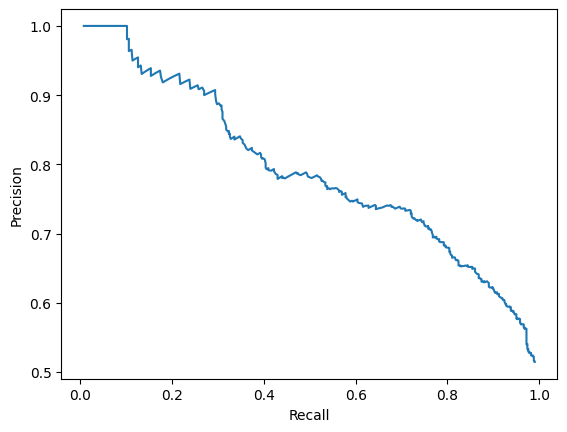

In [ ]:
import matplotlib.pyplot as plt

precisions = []
recalls = []
for thr in np.linspace(0, 1, 1000):
  metrics = calculate_metrics(ground_truth, predictions, thr)
  recalls.append(metrics['recall'])
  precisions.append(metrics['precision'])

plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()